In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


In [2]:
udemy = pd.read_csv('Udemy.csv')

In [3]:
udemy

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.00000,0.00000,0.00000,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.00000,0.00000,0.00000,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.00000,0.00000,0.00000,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.00000,0.00000,0.00000,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
udemy.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,12205.000000,13111.000000
mean,1.681721e+06,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,493.943794,4646.992602
std,9.539271e+05,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,267.827260,3109.101019
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,8.580862e+05,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1600.000000
50%,1.623421e+06,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2.503720e+06,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,3.486006e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


In [5]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [6]:
udemy.isnull().sum() #number of null or NaN values for each attribute

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64

In [7]:
udemy.nunique() #number of unique values for each attribute

id                              13608
title                           13563
url                             13608
is_paid                             2
num_subscribers                  4875
avg_rating                       1965
avg_rating_recent               11781
rating                          11781
num_reviews                      1285
is_wishlisted                       1
num_published_lectures            301
num_published_practice_tests        7
created                         13607
published_time                  13605
discount_price__amount             53
discount_price__currency            1
discount_price__price_string       53
price_detail__amount               37
price_detail__currency              1
price_detail__price_string         37
dtype: int64

In [8]:
udemy[udemy.avg_rating_recent!=udemy.rating] #to check if avg_rating_recent & rating have the same values

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string


In [9]:
udemy[udemy.is_paid & udemy.price_detail__amount.isnull()] #to check if there are any paid courses that doesn't have a price listed

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
13607,2935720,Acabou a Previdência e agora? - Volume 03,/course/acabou-a-previdencia-e-agora-volume-03/,True,0,0.0,0.0,0.0,0,False,14,0,2020-03-30T19:10:58Z,2020-04-02T16:33:32Z,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
udemy.drop(['discount_price__price_string','price_detail__price_string'],axis=1,inplace=True) #redundant attributes
udemy.drop(['id','url'],axis=1,inplace=True) #unique id's and url's which are irrelevant in our analysis
udemy.drop(['avg_rating_recent'],axis=1,inplace=True) #is the same as rating
udemy.drop(['is_wishlisted'],axis=1,inplace=True) #is always false
udemy.drop(13607,axis=0,inplace=True) #paid course with no price listed
udemy

,title,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency
0,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,78006,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,8640.0,INR
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,54581,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,8640.0,INR
2,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,52653,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,8640.0,INR
3,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,46447,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,8640.0,INR
4,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,41630,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,8640.0,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13602,מסחר אוטומטי בשוק ההון,False,19,0.00000,0.00000,0,20,0,2020-08-06T10:59:41Z,2020-08-06T15:37:04Z,NaN,NaN,NaN,NaN
13603,מושגים בסיסיים באופציות חלק ב,False,47,0.00000,0.00000,0,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN
13604,Programa de Integridade,False,19,0.00000,0.00000,0,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN
13605,Goodwill and Method of Calculating Goodwill (A...,False,47,0.00000,0.00000,0,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN


In [11]:
udemy[['created','published_time']]

,created,published_time
0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z
1,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z
2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z
3,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z
4,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z
...,...,...
13602,2020-08-06T10:59:41Z,2020-08-06T15:37:04Z
13603,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z
13604,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z
13605,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z


In [12]:
udemy['created'] = pd.to_datetime(udemy['created']).dt.tz_localize(None)
udemy['published_time'] = pd.to_datetime(udemy['published_time']).dt.tz_localize(None)
#change dates from (object) datatype to (datetime)
udemy[['created','published_time']]

,created,published_time
0,2016-02-14 22:57:48,2016-04-06 05:16:11
1,2016-08-22 12:10:18,2016-08-23 16:59:49
2,2017-09-26 16:32:48,2017-11-14 23:58:14
3,2015-10-23 13:34:35,2016-01-21 01:38:48
4,2015-10-12 06:39:46,2016-01-11 21:39:33
...,...,...
13602,2020-08-06 10:59:41,2020-08-06 15:37:04
13603,2020-04-15 10:20:17,2020-04-23 02:06:55
13604,2020-09-01 17:57:15,2020-09-03 15:26:47
13605,2020-07-27 02:29:18,2020-07-31 12:14:40


In [13]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13607 entries, 0 to 13606
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         13607 non-null  object        
 1   is_paid                       13607 non-null  bool          
 2   num_subscribers               13607 non-null  int64         
 3   avg_rating                    13607 non-null  float64       
 4   rating                        13607 non-null  float64       
 5   num_reviews                   13607 non-null  int64         
 6   num_published_lectures        13607 non-null  int64         
 7   num_published_practice_tests  13607 non-null  int64         
 8   created                       13607 non-null  datetime64[ns]
 9   published_time                13607 non-null  datetime64[ns]
 10  discount_price__amount        12205 non-null  float64       
 11  discount_price__currency    

In [14]:
udemy.tail(5)

,title,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency
13602,מסחר אוטומטי בשוק ההון,False,19,0.0,0.0,0,20,0,2020-08-06 10:59:41,2020-08-06 15:37:04,NaN,NaN,NaN,NaN
13603,מושגים בסיסיים באופציות חלק ב,False,47,0.0,0.0,0,6,0,2020-04-15 10:20:17,2020-04-23 02:06:55,NaN,NaN,NaN,NaN
13604,Programa de Integridade,False,19,0.0,0.0,0,5,0,2020-09-01 17:57:15,2020-09-03 15:26:47,NaN,NaN,NaN,NaN
13605,Goodwill and Method of Calculating Goodwill (A...,False,47,0.0,0.0,0,5,0,2020-07-27 02:29:18,2020-07-31 12:14:40,NaN,NaN,NaN,NaN
13606,Poderoso Investidor,False,48,0.0,0.0,0,13,0,2020-06-07 01:29:53,2020-07-15 10:35:38,NaN,NaN,NaN,NaN


In [15]:
udemy[~udemy.is_paid & udemy.price_detail__amount!=0] #to check for a free course that has a listed price

,title,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency


In [16]:
udemy.discount_price__amount.fillna(0,inplace=True)
udemy.price_detail__amount.fillna(0,inplace=True)
#fill NaN prices with 0
udemy.discount_price__currency.fillna('INR',inplace=True)
udemy.price_detail__currency.fillna('INR',inplace=True)
#all prices are in INR so we fill NaN currencies with INR

In [17]:
udemy.isnull().sum() #no null values

title                           0
is_paid                         0
num_subscribers                 0
avg_rating                      0
rating                          0
num_reviews                     0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
discount_price__currency        0
price_detail__amount            0
price_detail__currency          0
dtype: int64

In [18]:
udemy.tail(5)

,title,is_paid,num_subscribers,avg_rating,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency
13602,מסחר אוטומטי בשוק ההון,False,19,0.0,0.0,0,20,0,2020-08-06 10:59:41,2020-08-06 15:37:04,0.0,INR,0.0,INR
13603,מושגים בסיסיים באופציות חלק ב,False,47,0.0,0.0,0,6,0,2020-04-15 10:20:17,2020-04-23 02:06:55,0.0,INR,0.0,INR
13604,Programa de Integridade,False,19,0.0,0.0,0,5,0,2020-09-01 17:57:15,2020-09-03 15:26:47,0.0,INR,0.0,INR
13605,Goodwill and Method of Calculating Goodwill (A...,False,47,0.0,0.0,0,5,0,2020-07-27 02:29:18,2020-07-31 12:14:40,0.0,INR,0.0,INR
13606,Poderoso Investidor,False,48,0.0,0.0,0,13,0,2020-06-07 01:29:53,2020-07-15 10:35:38,0.0,INR,0.0,INR


<AxesSubplot:title={'center':'Free/paid courses'}>

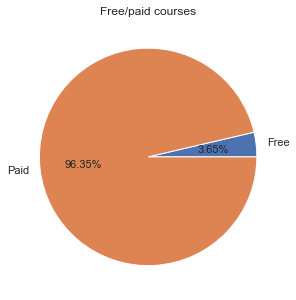

In [19]:
udemy.groupby('is_paid').size().plot(ylabel='',title='Free/paid courses',kind='pie', autopct='%.2f%%',labels = ['Free','Paid'],figsize=(5,5),fontsize=11)

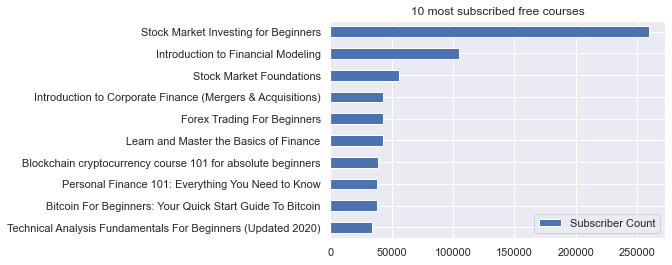

In [20]:
data_free = udemy[udemy.is_paid == False].sort_values(by = 'num_subscribers',ascending = False)[:10]
plot = data_free.sort_values(by='num_subscribers').plot(kind='barh',y='num_subscribers',x='title',xlabel='',title='10 most subscribed free courses')
plot.legend(['Subscriber Count'])

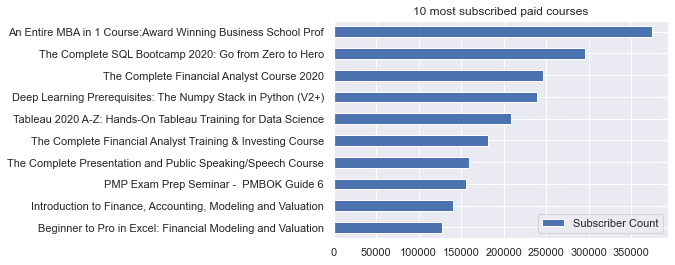

In [21]:
data_paid = data_free = udemy[udemy.is_paid == True].sort_values(by = 'num_subscribers',ascending = False)[:10]
plot = data_free.sort_values(by='num_subscribers').plot(kind='barh',y='num_subscribers',x='title',xlabel='',title='10 most subscribed paid courses')
plot.legend(['Subscriber Count'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Rating')

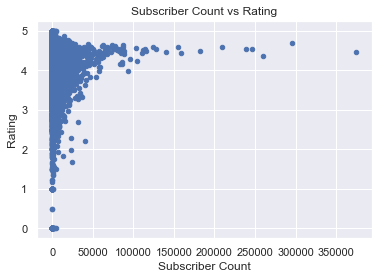

In [22]:
plot = udemy.plot.scatter(x = "num_subscribers", y = "rating", title = "Subscriber Count vs Rating")
plot.set_xlabel('Subscriber Count')
plot.set_ylabel('Rating')

Text(0.5, 0, 'Price (INR)')

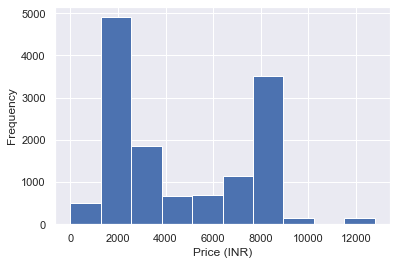

In [23]:
plot = udemy.price_detail__amount.plot.hist()
plot.set_xlabel('Price (INR)')

<AxesSubplot:ylabel='Frequency'>

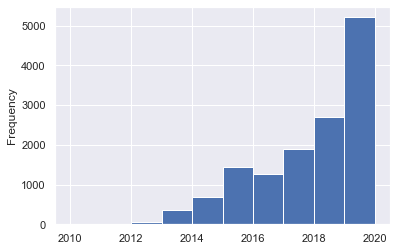

In [24]:
udemy.published_time.dt.year.plot.hist()

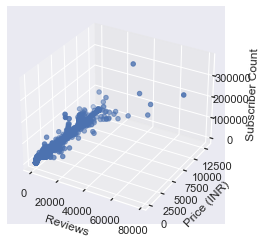

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = udemy['num_reviews']
y = udemy['price_detail__amount']
z = udemy['num_subscribers']
ax.set_xlabel("Reviews")
ax.set_ylabel("Price (INR)")
ax.set_zlabel("Subscriber Count")

ax.scatter(x, y,z)

plt.show()

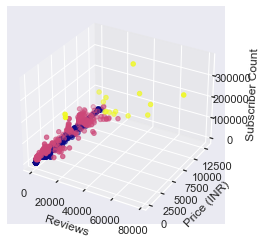

In [26]:
kmeans = KMeans(init='k-means++',n_clusters=3)
X=udemy[['num_subscribers','price_detail__amount','num_reviews']]
kmeans.fit(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("Reviews")
ax.set_ylabel("Price (INR)")
ax.set_zlabel("Subscriber Count")

ax.scatter(x,y,z,c=kmeans.labels_, cmap='plasma')
plt.show()

In [27]:
udemy.to_csv(r'cleaned_dataset.csv')